In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_rows', 200)

In [3]:
df = pd.read_csv("../../data/bloom_lab_dms.csv")

In [4]:
# Add column where bind_avg is converted to a pseudo DDG
df['bind_ddgs'] = np.log(10**(df['bind_avg']*-1))*0.6

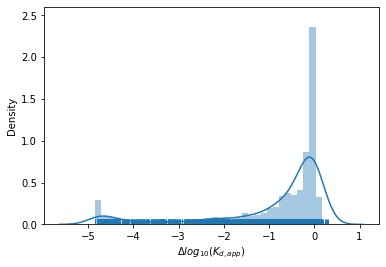

In [4]:
sns.distplot(df['bind_avg'], rug=True)
plt.xlabel(r'$\Delta log_{10}(K_{d,app})$')
plt.show()

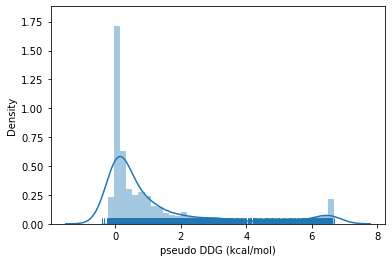

In [5]:
sns.distplot(df['bind_ddgs'], rug=True)
plt.xlabel('pseudo DDG (kcal/mol)')
plt.show()

There are a lot of mutations that decrease RBD:ACE2 binding drastically, but there are not a lot of mutations that increase binding affinity significantly.

In [42]:
df.sort_values('bind_ddgs', ascending=True).head(10)

,site_RBD,site_SARS2,wildtype,mutant,mutation,mutation_RBD,bind_lib1,bind_lib2,bind_avg,expr_lib1,expr_lib2,expr_avg,bind_ddgs
3513,168,498,Q,H,Q498H,Q168H,0.30,0.31,0.30,0.15,0.16,0.16,-0.414465
3574,171,501,N,F,N501F,N171F,0.22,0.36,0.29,-0.03,-0.16,-0.10,-0.400650
2566,123,453,Y,F,Y453F,Y123F,0.19,0.31,0.25,-0.13,-0.04,-0.08,-0.345388
3589,171,501,N,Y,N501Y,N171Y,0.09,0.38,0.24,-0.06,-0.22,-0.14,-0.331572
1148,55,385,T,R,T385R,T55R,0.36,0.03,0.19,0.04,-0.08,-0.02,-0.262495
3412,163,493,Q,M,Q493M,Q163M,0.00,0.35,0.18,-0.10,-0.05,-0.07,-0.248679
3526,168,498,Q,Y,Q498Y,Q168Y,0.01,0.30,0.16,0.19,-0.07,0.06,-0.221048
1743,84,414,Q,A,Q414A,Q84A,0.07,0.24,0.16,0.35,0.24,0.30,-0.221048
3587,171,501,N,V,N501V,N171V,0.12,0.17,0.15,-0.21,-0.17,-0.19,-0.207233
3511,168,498,Q,F,Q498F,Q168F,0.17,0.12,0.15,0.04,0.07,0.05,-0.207233


In [10]:
df.sort_values('bind_ddgs', ascending=False).head(10)

,site_RBD,site_SARS2,wildtype,mutant,mutation,mutation_RBD,bind_lib1,bind_lib2,bind_avg,expr_lib1,expr_lib2,expr_avg,bind_ddgs
403,20,350,V,F,V350F,V20F,NaN,-4.84,-4.84,NaN,-2.09,-2.09,6.686707
2106,101,431,G,H,G431H,G101H,-4.76,-4.84,-4.80,-2.89,-2.82,-2.86,6.631445
2155,103,433,V,Q,V433Q,V103Q,-4.76,-4.84,-4.80,-3.19,-3.03,-3.11,6.631445
2100,101,431,G,A,G431A,G101A,-4.76,-4.84,-4.80,-2.75,-2.75,-2.75,6.631445
1673,80,410,I,R,I410R,I80R,-4.76,-4.84,-4.80,-2.89,-2.79,-2.84,6.631445
1674,80,410,I,S,I410S,I80S,-4.76,-4.84,-4.80,-2.64,-2.66,-2.65,6.631445
2103,101,431,G,E,G431E,G101E,-4.76,-4.84,-4.80,-3.05,-2.86,-2.96,6.631445
2107,101,431,G,I,G431I,G101I,-4.76,-4.84,-4.80,-2.57,-2.37,-2.47,6.631445
2108,101,431,G,K,G431K,G101K,-4.76,-4.84,-4.80,-3.01,-2.82,-2.92,6.631445
2112,101,431,G,P,G431P,G101P,-4.76,-4.84,-4.80,-3.00,-2.83,-2.91,6.631445


Choose V350F, V433Q, G431A, I410S to add to preliminary validation set (excluded charged amino acids and HIS).

Check how many mutations have abs(score) > 2

In [10]:
df[df['bind_avg'] < -1].sort_values('bind_avg', ascending=True)

,site_RBD,site_SARS2,wildtype,mutant,mutation,mutation_RBD,bind_lib1,bind_lib2,bind_avg,expr_lib1,expr_lib2,expr_avg,bind_ddgs
403,20,350,V,F,V350F,V20F,NaN,-4.84,-4.84,NaN,-2.09,-2.09,6.686707
3757,179,509,R,Y,R509Y,R179Y,-4.76,-4.84,-4.80,-2.03,-2.09,-2.06,6.631445
1829,88,418,I,D,I418D,I88D,-4.76,-4.84,-4.80,-2.76,-2.53,-2.65,6.631445
1830,88,418,I,E,I418E,I88E,-4.76,-4.84,-4.80,-2.66,-2.74,-2.70,6.631445
3794,181,511,V,R,V511R,V181R,-4.76,-4.84,-4.80,-3.04,-2.96,-3.00,6.631445
...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,21,351,Y,Q,Y351Q,Y21Q,-1.11,-0.90,-1.01,-1.97,-1.88,-1.93,1.395367
2643,126,456,F,W,F456W,F126W,-0.91,-1.10,-1.01,-0.10,0.01,-0.04,1.395367
1755,84,414,Q,P,Q414P,Q84P,-0.92,-1.09,-1.01,-2.62,-2.37,-2.49,1.395367
791,38,368,L,R,L368R,L38R,-0.95,-1.07,-1.01,-2.19,-2.05,-2.12,1.395367


In [12]:
df['site_SARS2']

0       331
1       331
2       331
3       331
4       331
       ... 
4216    531
4217    531
4218    531
4219    531
4220    531
Name: site_SARS2, Length: 4221, dtype: int64

Check how many mutations have abs(score) > 2 and are in the RBM

In [13]:
rbm = [502, 497, 489, 505, 487, 506, 495, 473, 456, 403, 447, 496, 449, 476, 500, 475, 455, 498, 439, 453, 486, 501, 499, 485, 484, 417, 474, 446, 494, 403, 493, 445, 490, 477]

In [14]:
df[(df['bind_avg'] < -1) & (df['site_SARS2'].isin(rbm)) & (df['expr_avg'] > -0.5)].sort_values('bind_avg', ascending=True)

,site_RBD,site_SARS2,wildtype,mutant,mutation,mutation_RBD,bind_lib1,bind_lib2,bind_avg,expr_lib1,expr_lib2,expr_avg,bind_ddgs
3601,172,502,G,M,G502M,G172M,-4.76,-4.84,-4.80,-0.12,-0.06,-0.09,6.631445
3605,172,502,G,R,G502R,G172R,-4.76,-4.84,-4.80,0.08,0.12,0.10,6.631445
3607,172,502,G,T,G502T,G172T,-4.76,-4.84,-4.80,0.00,0.30,0.15,6.631445
3608,172,502,G,V,G502V,G172V,-4.76,-4.84,-4.80,0.19,0.00,0.10,6.631445
3600,172,502,G,L,G502L,G172L,-4.76,-4.84,-4.80,-0.14,-0.19,-0.16,6.631445
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,73,403,R,A,R403A,R73A,-0.98,-1.15,-1.06,-0.22,-0.21,-0.22,1.464444
3482,166,496,G,V,G496V,G166V,-0.97,-1.13,-1.05,-0.08,0.01,-0.04,1.450629
1808,87,417,K,D,K417D,K87D,-0.96,-1.11,-1.04,-0.27,-0.39,-0.33,1.436813
3533,169,499,P,G,P499G,P169G,-0.91,-1.13,-1.02,-0.23,-0.24,-0.23,1.409182


In [8]:
df[df['mutation'] == 'N439K']

,site_RBD,site_SARS2,wildtype,mutant,mutation,mutation_RBD,bind_lib1,bind_lib2,bind_avg,expr_lib1,expr_lib2,expr_avg,bind_ddgs
2276,109,439,N,K,N439K,N109K,0.11,-0.02,0.04,-0.33,-0.36,-0.35,-0.055262


In [7]:
df[df['mutation'] == 'N501Y']

,site_RBD,site_SARS2,wildtype,mutant,mutation,mutation_RBD,bind_lib1,bind_lib2,bind_avg,expr_lib1,expr_lib2,expr_avg,bind_ddgs
3589,171,501,N,Y,N501Y,N171Y,0.09,0.38,0.24,-0.06,-0.22,-0.14,-0.331572


In [5]:
df[df['mutation'] == 'N501D']

,site_RBD,site_SARS2,wildtype,mutant,mutation,mutation_RBD,bind_lib1,bind_lib2,bind_avg,expr_lib1,expr_lib2,expr_avg,bind_ddgs
3572,171,501,N,D,N501D,N171D,-2.4,-2.44,-2.42,0.09,0.07,0.08,3.343354


In [9]:
df[df['mutation'] == 'E484K']

,site_RBD,site_SARS2,wildtype,mutant,mutation,mutation_RBD,bind_lib1,bind_lib2,bind_avg,expr_lib1,expr_lib2,expr_avg,bind_ddgs
3221,154,484,E,K,E484K,E154K,0.09,0.03,0.06,-0.13,-0.08,-0.1,-0.082893


In [10]:
df[df['mutation'] == 'K417V']

,site_RBD,site_SARS2,wildtype,mutant,mutation,mutation_RBD,bind_lib1,bind_lib2,bind_avg,expr_lib1,expr_lib2,expr_avg,bind_ddgs
1823,87,417,K,V,K417V,K87V,-0.25,-0.39,-0.32,0.63,0.67,0.65,0.442096


In [11]:
df[df['mutation'] == 'K417N']

,site_RBD,site_SARS2,wildtype,mutant,mutation,mutation_RBD,bind_lib1,bind_lib2,bind_avg,expr_lib1,expr_lib2,expr_avg,bind_ddgs
1817,87,417,K,N,K417N,K87N,-0.43,-0.48,-0.45,0.14,0.06,0.1,0.621698


In [5]:
df[df['mutation'] == 'T500I']

,site_RBD,site_SARS2,wildtype,mutant,mutation,mutation_RBD,bind_lib1,bind_lib2,bind_avg,expr_lib1,expr_lib2,expr_avg,bind_ddgs
3556,170,500,T,I,T500I,T170I,-2.27,-2.32,-2.3,-0.48,-0.48,-0.48,3.177567


In [7]:
df[df['mutation'] == 'V350F']

,site_RBD,site_SARS2,wildtype,mutant,mutation,mutation_RBD,bind_lib1,bind_lib2,bind_avg,expr_lib1,expr_lib2,expr_avg,bind_ddgs
403,20,350,V,F,V350F,V20F,NaN,-4.84,-4.84,NaN,-2.09,-2.09,6.686707


Chose -0.5 expression cutoff because it seemed reasonable from above mutations.. Should check with Laura/Tyler about what cutoff is right to use here

In [17]:
df[(df['bind_avg'] < -1) & (df['site_SARS2'].isin(rbm)) & (df['expr_avg'] > -0.5)].sort_values('bind_avg', ascending=True)[['mutation', 'bind_avg', 'expr_avg']]

,mutation,bind_avg,expr_avg
3601,G502M,-4.80,-0.09
3605,G502R,-4.80,0.10
3607,G502T,-4.80,0.15
3608,G502V,-4.80,0.10
3600,G502L,-4.80,-0.16
3610,G502Y,-4.80,-0.27
3595,G502F,-4.80,-0.19
3609,G502W,-4.80,-0.29
3333,Y489S,-4.80,0.06
3604,G502Q,-4.68,0.16


In [18]:
df[df['mutation'] == 'N487S']

,site_RBD,site_SARS2,wildtype,mutant,mutation,mutation_RBD,bind_lib1,bind_lib2,bind_avg,expr_lib1,expr_lib2,expr_avg,bind_ddgs
3291,157,487,N,S,N487S,N157S,-1.49,-1.54,-1.51,-0.26,-0.14,-0.2,2.086142


In [7]:
df[df['mutation'] == 'V433Q']

,site_RBD,site_SARS2,wildtype,mutant,mutation,mutation_RBD,bind_lib1,bind_lib2,bind_avg,expr_lib1,expr_lib2,expr_avg,bind_ddgs
2155,103,433,V,Q,V433Q,V103Q,-4.76,-4.84,-4.8,-3.19,-3.03,-3.11,6.631445


In [5]:
df[df['mutation'] == 'G431A']

,site_RBD,site_SARS2,wildtype,mutant,mutation,mutation_RBD,bind_lib1,bind_lib2,bind_avg,expr_lib1,expr_lib2,expr_avg,bind_ddgs
2100,101,431,G,A,G431A,G101A,-4.76,-4.84,-4.8,-2.75,-2.75,-2.75,6.631445


In [6]:
df[df['mutation'] == 'I410S']

,site_RBD,site_SARS2,wildtype,mutant,mutation,mutation_RBD,bind_lib1,bind_lib2,bind_avg,expr_lib1,expr_lib2,expr_avg,bind_ddgs
1674,80,410,I,S,I410S,I80S,-4.76,-4.84,-4.8,-2.64,-2.66,-2.65,6.631445


In [8]:
df[df['mutation'] == 'Y453F']

,site_RBD,site_SARS2,wildtype,mutant,mutation,mutation_RBD,bind_lib1,bind_lib2,bind_avg,expr_lib1,expr_lib2,expr_avg,bind_ddgs
2566,123,453,Y,F,Y453F,Y123F,0.19,0.31,0.25,-0.13,-0.04,-0.08,-0.345388


In [9]:
df[df['mutation'] == 'Q493A']

,site_RBD,site_SARS2,wildtype,mutant,mutation,mutation_RBD,bind_lib1,bind_lib2,bind_avg,expr_lib1,expr_lib2,expr_avg,bind_ddgs
3402,163,493,Q,A,Q493A,Q163A,0.0,0.26,0.13,0.09,0.02,0.06,-0.179602


In [5]:
df[df['mutation'] == 'Y489Q']

,site_RBD,site_SARS2,wildtype,mutant,mutation,mutation_RBD,bind_lib1,bind_lib2,bind_avg,expr_lib1,expr_lib2,expr_avg,bind_ddgs
3331,159,489,Y,Q,Y489Q,Y159Q,-2.17,-2.23,-2.2,-0.15,-0.22,-0.18,3.039412


In [5]:
df[df['mutation'] == 'N487R']

,site_RBD,site_SARS2,wildtype,mutant,mutation,mutation_RBD,bind_lib1,bind_lib2,bind_avg,expr_lib1,expr_lib2,expr_avg,bind_ddgs
3290,157,487,N,R,N487R,N157R,-2.24,-2.36,-2.3,-0.18,-0.32,-0.25,3.177567


In [6]:
l = ['V350F', 'V433Q', 'G431A', 'I410S', 'N439K', 'N501Y', 'Y453F', 'Q493A', 'T500I', 'N487R', 'N501D', 'Y489Q', 'E484K', 'K417N']
df[df['mutation'].isin(l)][['mutation', 'expr_avg', 'bind_avg']]

,mutation,expr_avg,bind_avg
403,V350F,-2.09,-4.84
1674,I410S,-2.65,-4.80
1817,K417N,0.10,-0.45
2100,G431A,-2.75,-4.80
2155,V433Q,-3.11,-4.80
2276,N439K,-0.35,0.04
2566,Y453F,-0.08,0.25
3221,E484K,-0.10,0.06
3290,N487R,-0.25,-2.30
3331,Y489Q,-0.18,-2.20


In [5]:
df[df['mutation'] == 'N501A']

,site_RBD,site_SARS2,wildtype,mutant,mutation,mutation_RBD,bind_lib1,bind_lib2,bind_avg,expr_lib1,expr_lib2,expr_avg,bind_ddgs
3570,171,501,N,A,N501A,N171A,-0.02,-0.1,-0.06,0.42,-0.29,0.07,0.082893


In [5]:
df[df['mutation'] == 'N501V']

,site_RBD,site_SARS2,wildtype,mutant,mutation,mutation_RBD,bind_lib1,bind_lib2,bind_avg,expr_lib1,expr_lib2,expr_avg,bind_ddgs
3587,171,501,N,V,N501V,N171V,0.12,0.17,0.15,-0.21,-0.17,-0.19,-0.207233


In [6]:
df[df['mutation'] == 'N501I']

,site_RBD,site_SARS2,wildtype,mutant,mutation,mutation_RBD,bind_lib1,bind_lib2,bind_avg,expr_lib1,expr_lib2,expr_avg,bind_ddgs
3577,171,501,N,I,N501I,N171I,0.0,-0.17,-0.08,-0.55,-0.84,-0.7,0.110524


In [7]:
df[df['mutation'] == 'N501L']

,site_RBD,site_SARS2,wildtype,mutant,mutation,mutation_RBD,bind_lib1,bind_lib2,bind_avg,expr_lib1,expr_lib2,expr_avg,bind_ddgs
3579,171,501,N,L,N501L,N171L,-1.08,-1.21,-1.15,-0.01,-0.06,-0.04,1.588784


In [8]:
df[df['mutation'] == 'N501M']

,site_RBD,site_SARS2,wildtype,mutant,mutation,mutation_RBD,bind_lib1,bind_lib2,bind_avg,expr_lib1,expr_lib2,expr_avg,bind_ddgs
3580,171,501,N,M,N501M,N171M,0.0,0.01,0.0,0.48,0.18,0.33,0.0


In [9]:
df[df['mutation'] == 'N501F']

,site_RBD,site_SARS2,wildtype,mutant,mutation,mutation_RBD,bind_lib1,bind_lib2,bind_avg,expr_lib1,expr_lib2,expr_avg,bind_ddgs
3574,171,501,N,F,N501F,N171F,0.22,0.36,0.29,-0.03,-0.16,-0.1,-0.40065


In [10]:
df[df['mutation'] == 'N501Y']

,site_RBD,site_SARS2,wildtype,mutant,mutation,mutation_RBD,bind_lib1,bind_lib2,bind_avg,expr_lib1,expr_lib2,expr_avg,bind_ddgs
3589,171,501,N,Y,N501Y,N171Y,0.09,0.38,0.24,-0.06,-0.22,-0.14,-0.331572


In [11]:
df[df['mutation'] == 'N501W']

,site_RBD,site_SARS2,wildtype,mutant,mutation,mutation_RBD,bind_lib1,bind_lib2,bind_avg,expr_lib1,expr_lib2,expr_avg,bind_ddgs
3588,171,501,N,W,N501W,N171W,0.22,0.01,0.11,0.05,0.15,0.1,-0.151971
